In [11]:
import numpy as np
import pandas as pd

data = pd.read_csv('Superstore.csv', encoding='latin-1')
print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [12]:
data = data.dropna()


In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month-Year'] = data['Order Date'].dt.to_period('M')


In [14]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month-Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


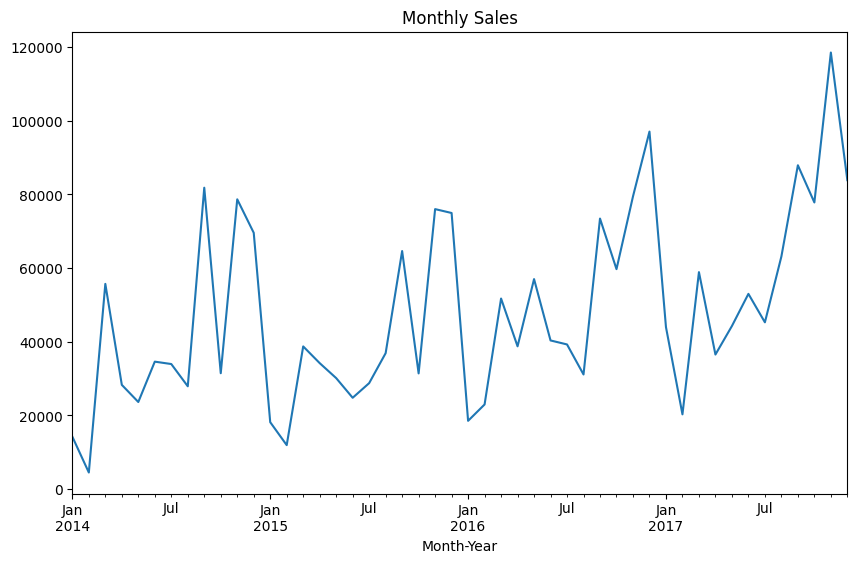

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sales_by_month = data.groupby('Month-Year')['Sales'].sum()
sales_by_month.plot(kind='line', figsize=(10,6),title = "Monthly Sales")
plt.show()

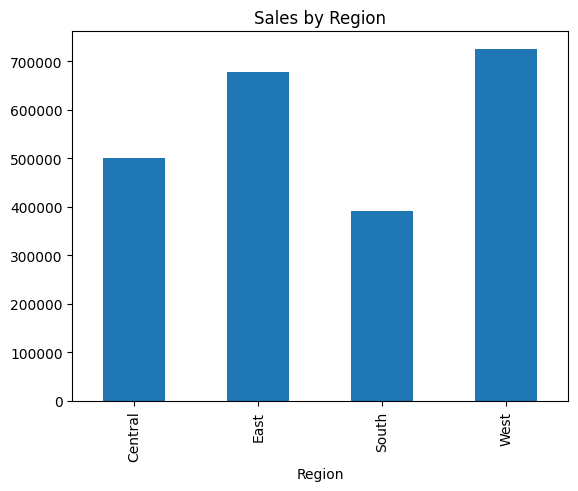

In [17]:
region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', title ="Sales by Region")
plt.show()

In [20]:
import sqlite3
conn = sqlite3.connect('sales.db')


data['Month-Year'] = data['Month-Year'].astype(str)

data.to_sql('sales', conn, if_exists='replace', index=False)

9994

In [21]:
query = "SELECT rEGION, sum(SALES) FROM sales GROUP BY REGION"
result = pd.read_sql_query(query, conn)
print(result)

    Region   sum(SALES)
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245


In [22]:
data.to_csv('cleaned_superstore.csv', index=False)
